## Imports

In [837]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

## Preparations

In [838]:
_df = pd.read_csv("./datasets/breast-cancer-wisconsin.csv")
_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [839]:
def get_target():
    _y = _df.diagnosis
    _y = pd.Series([int(x == "B") for x in _y])
    return _y

In [840]:
y = get_target()
x = _df.drop(["Unnamed: 32", "id", "diagnosis"], axis=1)
x.head(), y

(   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst 

In [841]:
def plot_history_performance(history):
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], color='#FFCC00', animated=True, label="Training Acc")
    plt.plot(history.history['val_accuracy'], color='green', animated=True, label="Validation Acc")
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

## Rough ANN

In [842]:
scaler = StandardScaler()
f__x = scaler.fit_transform(x)
f__x.shape

(569, 30)

In [843]:
over = RandomOverSampler()
yy = get_target()
f__xx, y2 = over.fit_resample(f__x, yy)
y2.shape, y.shape

((714,), (569,))

In [844]:
X_train, X_temp, y_train, y_temp = train_test_split(f__xx, y2, test_size=.5, random_state=36)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=.25, random_state=43)
x.shape, X_train.shape, X_valid.shape, X_test.shape

((569, 30), (357, 30), (267, 30), (90, 30))

In [845]:
# scaler = StandardScaler()
# X_norm_train, X_norm_val, X_norm_test = scaler.fit_transform(X_train), scaler.transform(X_valid), scaler.transform(X_test)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


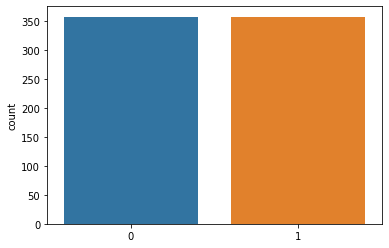

In [846]:
counts = f__xx=y2
ax = sns.countplot(counts)

## HYPER-PARAMS


In [847]:
EPOCH_LENGTH=12
BATCH_SIZE=16

LEARN_RATE=.001

DROPOUT_RATE=.2

In [848]:
model = keras.Sequential([
    keras.Input(shape=(30,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dropout(DROPOUT_RATE),
    keras.layers.Dense(2, activation="sigmoid")
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/12
23/23 [==============================] - 2s 71ms/step - loss: 0.4756 - accuracy: 0.7591 - val_loss: 0.3268 - val_accuracy: 0.9064
Epoch 2/12
23/23 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.9132 - val_loss: 0.2440 - val_accuracy: 0.9326
Epoch 3/12
23/23 [==============================] - 0s 6ms/step - loss: 0.2118 - accuracy: 0.9524 - val_loss: 0.2017 - val_accuracy: 0.9438
Epoch 4/12
23/23 [==============================] - 0s 6ms/step - loss: 0.1694 - accuracy: 0.9664 - val_loss: 0.1763 - val_accuracy: 0.9476
Epoch 5/12
23/23 [==============================] - 0s 5ms/step - loss: 0.1601 - accuracy: 0.9692 - val_loss: 0.1582 - val_accuracy: 0.9588
Epoch 6/12
23/23 [==============================] - 0s 5ms/step - loss: 0.1275 - accuracy: 0.9692 - val_loss: 0.1437 - val_accuracy: 0.9588
Epoch 7/12
23/23 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9636 - val_loss: 0.1340 - val_accuracy: 0.9625
Epoch 8/12
23/23 [=

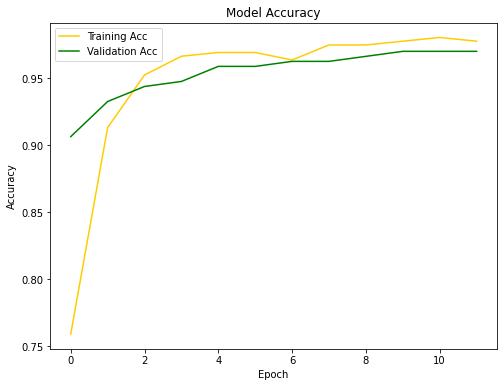

3/3 [==============================] - 0s 5ms/step - loss: 0.0683 - accuracy: 0.9889


[0.06827747076749802, 0.9888888597488403]

In [849]:
history = None
history = model.fit(
    X_train, y_train,
    epochs=EPOCH_LENGTH,
    batch_size=BATCH_SIZE,
    validation_data=(X_valid, y_valid)
)

plot_history_performance(history=history)

model.evaluate(X_test, y_test)

## Correlated Features Dropped

In [850]:
cols_to_drop=['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_2 = x.drop(cols_to_drop, axis=1)

In [851]:
scaler = StandardScaler()
_x_2 = scaler.fit_transform(x_2)

over = RandomOverSampler()
yy = get_target()
__x_2, y = over.fit_resample(_x_2, yy)

X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(__x_2, y, test_size=.5, random_state=36)
X_valid_2, X_test_2, y_valid_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=.25, random_state=43)
x_2.shape, X_train_2.shape, X_valid_2.shape, X_test_2.shape

((569, 16), (357, 16), (267, 16), (90, 16))

In [852]:
scaler = StandardScaler()
X_norm_train_2, X_norm_val_2, X_norm_test_2 = scaler.fit_transform(X_train_2), scaler.transform(X_valid_2), scaler.transform(X_test_2)

In [853]:
model_2 = keras.Sequential([
    keras.Input(shape=(16,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dropout(DROPOUT_RATE**2),
    keras.layers.Dense(2, activation="sigmoid")
])
model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/24
23/23 [==============================] - 1s 17ms/step - loss: 1.1372 - accuracy: 0.2353 - val_loss: 0.9107 - val_accuracy: 0.3783
Epoch 2/24
23/23 [==============================] - 0s 9ms/step - loss: 0.8751 - accuracy: 0.4146 - val_loss: 0.7252 - val_accuracy: 0.5318
Epoch 3/24
23/23 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.6078 - val_loss: 0.6056 - val_accuracy: 0.6891
Epoch 4/24
23/23 [==============================] - 0s 5ms/step - loss: 0.5721 - accuracy: 0.7367 - val_loss: 0.5138 - val_accuracy: 0.7865
Epoch 5/24
23/23 [==============================] - 0s 5ms/step - loss: 0.4734 - accuracy: 0.8291 - val_loss: 0.4470 - val_accuracy: 0.8352
Epoch 6/24
23/23 [==============================] - 0s 5ms/step - loss: 0.4218 - accuracy: 0.8543 - val_loss: 0.3928 - val_accuracy: 0.8689
Epoch 7/24
23/23 [==============================] - 0s 5ms/step - loss: 0.3648 - accuracy: 0.8908 - val_loss: 0.3498 - val_accuracy: 0.9064
Epoch 8/24
23/23 [=

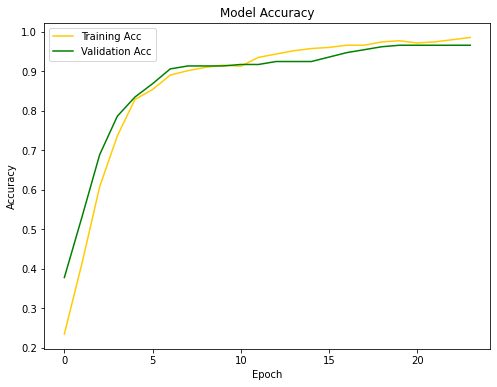

3/3 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9667


[0.07623106241226196, 0.9666666388511658]

In [854]:
history_2 = None
history_2 = model_2.fit(
    X_norm_train_2, y_train_2,
    epochs=EPOCH_LENGTH*2,
    batch_size=BATCH_SIZE,
    validation_data=(X_norm_val_2, y_valid_2)
)

plot_history_performance(history=history_2)

model_2.evaluate(X_norm_test_2, y_test_2)

## Feature Ranking and Selection

In [855]:
yyy = get_target()
K=5
select_feature = SelectKBest(chi2, k=K).fit(x_2, yyy)

__df = pd.DataFrame(dict(feature=x_2.columns, score=select_feature.scores_), index=None).sort_values(by="score", ascending=False, kind="stable", ignore_index=True)
__df

,feature,score
0,area_mean,53991.655924
1,area_se,8758.504705
2,texture_mean,93.897508
3,concavity_worst,39.516915
4,concavity_mean,19.712354
5,symmetry_worst,1.298861
6,concavity_se,1.044718
7,smoothness_worst,0.397366
8,symmetry_mean,0.257380
9,fractal_dimension_worst,0.231522


In [856]:
X_train_3 = select_feature.transform(X_train_2)
X_valid_3 = select_feature.transform(X_valid_2)
X_test_3 = select_feature.transform(X_test_2)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


In [857]:
scaler = StandardScaler()
X_norm_train_3, X_norm_val_3, X_norm_test_3 = scaler.fit_transform(X_train_3), scaler.transform(X_valid_3), scaler.transform(X_test_3)

In [858]:
model_3 = keras.Sequential([
    keras.Input(shape=(K,)),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dropout(DROPOUT_RATE**2),
    keras.layers.Dense(6, activation="relu"),
    keras.layers.Dense(4, activation="sigmoid"),
    keras.layers.Dense(2, activation="sigmoid")
])
model_3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/24
23/23 [==============================] - 1s 17ms/step - loss: 0.7154 - accuracy: 0.4594 - val_loss: 0.6818 - val_accuracy: 0.5281
Epoch 2/24
23/23 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.4594 - val_loss: 0.6601 - val_accuracy: 0.5281
Epoch 3/24
23/23 [==============================] - 0s 6ms/step - loss: 0.6650 - accuracy: 0.4594 - val_loss: 0.6395 - val_accuracy: 0.7566
Epoch 4/24
23/23 [==============================] - 0s 5ms/step - loss: 0.6415 - accuracy: 0.7871 - val_loss: 0.6158 - val_accuracy: 0.8839
Epoch 5/24
23/23 [==============================] - 0s 5ms/step - loss: 0.6155 - accuracy: 0.8992 - val_loss: 0.5904 - val_accuracy: 0.8914
Epoch 6/24
23/23 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.9188 - val_loss: 0.5644 - val_accuracy: 0.8876
Epoch 7/24
23/23 [==============================] - 0s 5ms/step - loss: 0.5612 - accuracy: 0.9216 - val_loss: 0.5401 - val_accuracy: 0.8876
Epoch 8/24
23/23 [=

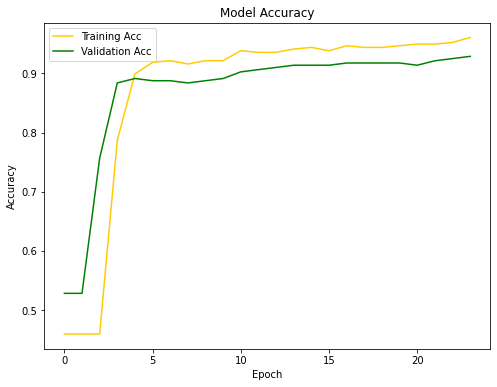

3/3 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9667
Epoch 1/24
12/12 [==============================] - 1s 26ms/step - loss: 0.6832 - accuracy: 0.5154 - val_loss: 0.6845 - val_accuracy: 0.4607
Epoch 2/24
12/12 [==============================] - 0s 7ms/step - loss: 0.6689 - accuracy: 0.5938 - val_loss: 0.6675 - val_accuracy: 0.6330
Epoch 3/24
12/12 [==============================] - 0s 7ms/step - loss: 0.6547 - accuracy: 0.7227 - val_loss: 0.6513 - val_accuracy: 0.7865
Epoch 4/24
12/12 [==============================] - 0s 7ms/step - loss: 0.6393 - accuracy: 0.7955 - val_loss: 0.6354 - val_accuracy: 0.8277
Epoch 5/24
12/12 [==============================] - 0s 7ms/step - loss: 0.6236 - accuracy: 0.8487 - val_loss: 0.6179 - val_accuracy: 0.8839
Epoch 6/24
12/12 [==============================] - 0s 7ms/step - loss: 0.6072 - accuracy: 0.8936 - val_loss: 0.6011 - val_accuracy: 0.8839
Epoch 7/24
12/12 [==============================] - 0s 7ms/step - loss: 0.

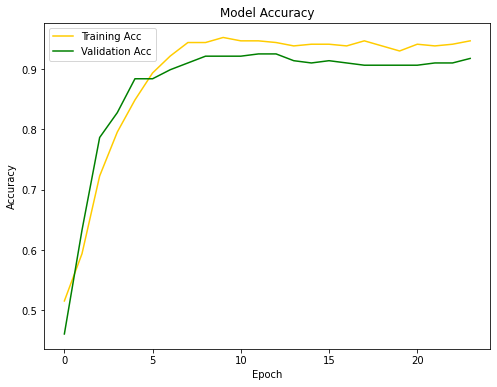

3/3 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.9556
Epoch 1/24
8/8 [==============================] - 1s 39ms/step - loss: 0.6770 - accuracy: 0.5406 - val_loss: 0.6887 - val_accuracy: 0.4719
Epoch 2/24
8/8 [==============================] - 0s 9ms/step - loss: 0.6669 - accuracy: 0.5406 - val_loss: 0.6782 - val_accuracy: 0.4719
Epoch 3/24
8/8 [==============================] - 0s 9ms/step - loss: 0.6606 - accuracy: 0.5406 - val_loss: 0.6690 - val_accuracy: 0.4719
Epoch 4/24
8/8 [==============================] - 0s 9ms/step - loss: 0.6528 - accuracy: 0.5406 - val_loss: 0.6611 - val_accuracy: 0.4719
Epoch 5/24
8/8 [==============================] - 0s 9ms/step - loss: 0.6451 - accuracy: 0.5406 - val_loss: 0.6535 - val_accuracy: 0.4719
Epoch 6/24
8/8 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.5406 - val_loss: 0.6456 - val_accuracy: 0.4719
Epoch 7/24
8/8 [==============================] - 0s 9ms/step - loss: 0.6302 - accurac

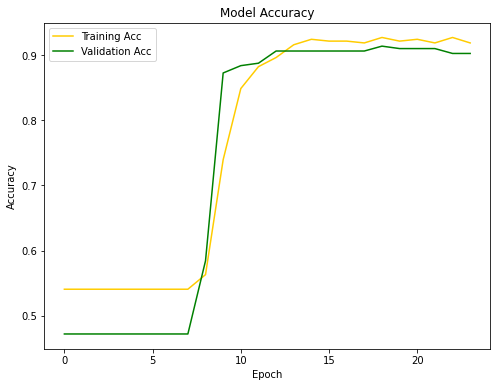

3/3 [==============================] - 0s 5ms/step - loss: 0.3680 - accuracy: 0.9444


,batch_no,pred,acc
0,16,0.223690,0.966667
1,32,0.330749,0.955556
2,48,0.367979,0.944444


In [859]:
import numpy as np

preds = []
for x in np.arange(1, 4)*BATCH_SIZE:
    model_3 = None
    history_3 = None
    model_3 = keras.Sequential([
        keras.Input(shape=(K,)),
        keras.layers.Dense(12, activation="relu"),
        keras.layers.Dropout(DROPOUT_RATE**2),
        keras.layers.Dense(6, activation="relu"),
        keras.layers.Dense(4, activation="sigmoid"),
        keras.layers.Dense(2, activation="sigmoid")
    ])
    model_3.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    history_3 = model_3.fit(
        X_norm_train_3, y_train_2,
        epochs=EPOCH_LENGTH*2,
        batch_size=x,
        validation_data=(X_norm_val_3, y_valid_2)
    )

    plot_history_performance(history=history_3)

    pred, acc = model_3.evaluate(X_norm_test_3, y_test_2)
    preds.append(dict(batch_no=x, pred=pred, acc=acc))

__dff = pd.DataFrame(preds)
__dff

Epoch 1/24
23/23 [==============================] - 1s 17ms/step - loss: 0.8876 - accuracy: 0.5406 - val_loss: 0.9306 - val_accuracy: 0.4719
Epoch 2/24
23/23 [==============================] - 0s 6ms/step - loss: 0.8101 - accuracy: 0.5406 - val_loss: 0.8491 - val_accuracy: 0.4719
Epoch 3/24
23/23 [==============================] - 0s 5ms/step - loss: 0.7478 - accuracy: 0.5406 - val_loss: 0.7819 - val_accuracy: 0.4719
Epoch 4/24
23/23 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5406 - val_loss: 0.7234 - val_accuracy: 0.4719
Epoch 5/24
23/23 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.5406 - val_loss: 0.6729 - val_accuracy: 0.4719
Epoch 6/24
23/23 [==============================] - 0s 7ms/step - loss: 0.6106 - accuracy: 0.5406 - val_loss: 0.6299 - val_accuracy: 0.4719
Epoch 7/24
23/23 [==============================] - 0s 5ms/step - loss: 0.5743 - accuracy: 0.5406 - val_loss: 0.5942 - val_accuracy: 0.4869
Epoch 8/24
23/23 [=

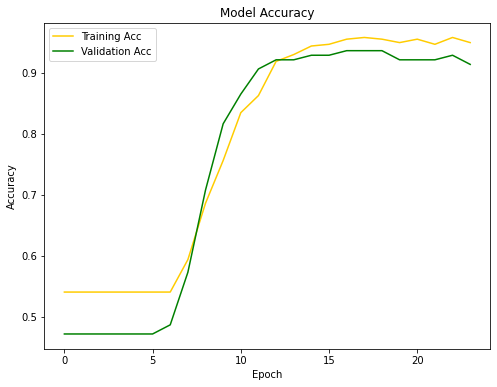

3/3 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.9667


In [860]:
model_4 = None
history_4 = None
model_4 = keras.Sequential([
        keras.Input(shape=(K,)),
        keras.layers.Dense(12, activation="relu"),
        keras.layers.Dropout(DROPOUT_RATE**2),
        keras.layers.Dense(6, activation="relu"),
        keras.layers.Dense(4, activation="sigmoid"),
        keras.layers.Dense(2, activation="sigmoid")
    ])
model_4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
history_4 = model_4.fit(
    X_norm_train_3, y_train_2,
    epochs=EPOCH_LENGTH*2,
    batch_size=BATCH_SIZE,
    validation_data=(X_norm_val_3, y_valid_2)
)

plot_history_performance(history=history_4)

pred, acc = model_4.evaluate(X_norm_test_3, y_test_2)

## Univariate Features Selection

In [861]:
xxxx = _df.drop(["Unnamed: 32", "id", "diagnosis"], axis=1)
yyyy = get_target()
xxxx.shape, yyyy.shape

((569, 30), (569,))

In [862]:
X_temp, X_TEST, Y_temp, Y_TEST = train_test_split(xxxx, yyyy, test_size=.3, random_state=37)
X_TRAIN, X_VALID, Y_TRAIN, Y_VALID = train_test_split(X_temp, Y_temp, test_size=.3, random_state=37)
X_TRAIN.shape, Y_TRAIN.shape, X_TEST.shape, Y_TEST.shape, X_VALID.shape, Y_VALID.shape

((278, 30), (278,), (171, 30), (171,), (120, 30), (120,))

Text(0, 0.5, 'Univariate score')

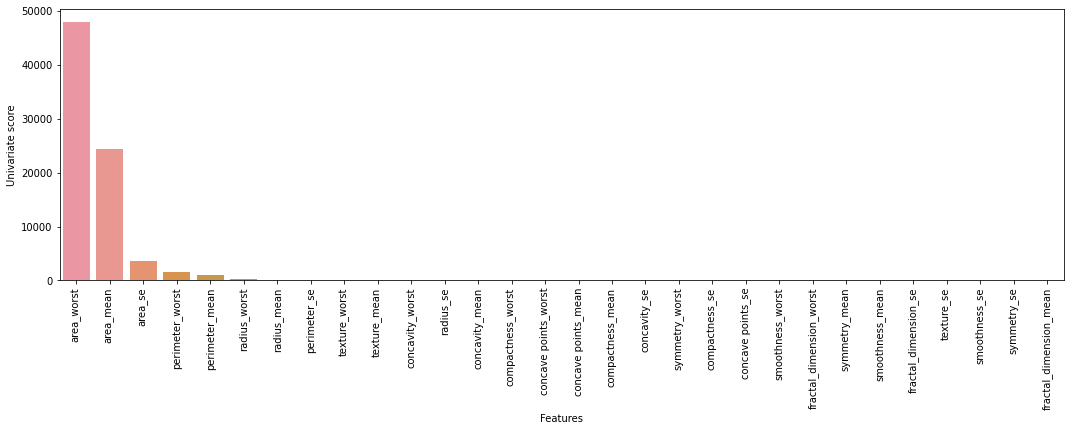

In [863]:
selector = SelectKBest(chi2, k=5)

selector.fit(X_TRAIN, Y_TRAIN)

__df = pd.DataFrame(dict(feature=X_TRAIN.columns, score=selector.scores_), index=None).sort_values(by="score", ascending=False, kind="stable", ignore_index=True)

plt.figure(figsize=(18,5))
sns.barplot(data=__df, x="feature", y="score")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Univariate score")

## RFE

In [864]:
cols_to_drop=['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
xxxxx = _df.drop(["Unnamed: 32", "id", "diagnosis"], axis=1).drop(cols_to_drop, axis=1)
yyyyy = get_target()
xxxxx.shape, yyyyy.shape

((569, 16), (569,))

In [865]:
scaler = StandardScaler()
xx_xxx = scaler.fit_transform(xxxxx)

In [866]:
over = RandomOverSampler()
xxx_xx, yyy_yy = over.fit_resample(xx_xxx, yyyyy)

In [867]:
X_temp, X_TEST, Y_temp, Y_TEST = train_test_split(xxx_xx, yyy_yy, test_size=.3, random_state=37)
X_TRAIN, X_VALID, Y_TRAIN, Y_VALID = train_test_split(X_temp, Y_temp, test_size=.3, random_state=37)
X_TRAIN.shape, Y_TRAIN.shape, X_TEST.shape, Y_TEST.shape, X_VALID.shape, Y_VALID.shape

((349, 16), (349,), (215, 16), (215,), (150, 16), (150,))

In [868]:
rfc = RandomForestClassifier()
rfe = RFE(estimator=rfc, n_features_to_select=5, step=1)
rfe = rfe.fit(X_TRAIN, Y_TRAIN)

xxxxx.columns[rfe.support_]

Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')

In [869]:
X_TRAIN = rfe.transform(X_TRAIN)
X_TEST = rfe.transform(X_TEST)
X_VALID = rfe.transform(X_VALID)

X_TRAIN.shape, X_TEST.shape, X_VALID.shape

((349, 5), (215, 5), (150, 5))

Epoch 1/9
22/22 [==============================] - 1s 18ms/step - loss: 0.6283 - accuracy: 0.6705 - val_loss: 0.5435 - val_accuracy: 0.7733
Epoch 2/9
22/22 [==============================] - 0s 9ms/step - loss: 0.5167 - accuracy: 0.8052 - val_loss: 0.4418 - val_accuracy: 0.8800
Epoch 3/9
22/22 [==============================] - 0s 7ms/step - loss: 0.4494 - accuracy: 0.8797 - val_loss: 0.3641 - val_accuracy: 0.9133
Epoch 4/9
22/22 [==============================] - 0s 8ms/step - loss: 0.3721 - accuracy: 0.8797 - val_loss: 0.3077 - val_accuracy: 0.9133
Epoch 5/9
22/22 [==============================] - 0s 6ms/step - loss: 0.3244 - accuracy: 0.8911 - val_loss: 0.2660 - val_accuracy: 0.9000
Epoch 6/9
22/22 [==============================] - 0s 7ms/step - loss: 0.2948 - accuracy: 0.9026 - val_loss: 0.2367 - val_accuracy: 0.9000
Epoch 7/9
22/22 [==============================] - 0s 7ms/step - loss: 0.2804 - accuracy: 0.9226 - val_loss: 0.2173 - val_accuracy: 0.9000
Epoch 8/9
22/22 [=========

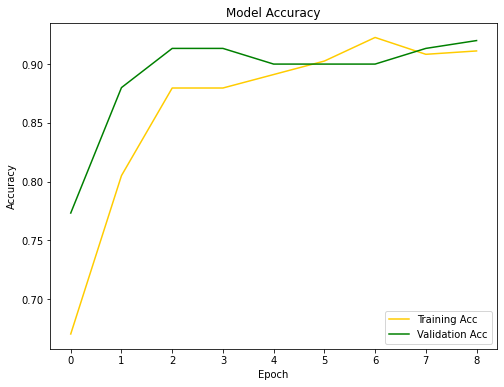

7/7 [==============================] - 0s 3ms/step - loss: 0.1821 - accuracy: 0.9442


In [870]:
model_5 = None
history_5 = None
model_5 = keras.Sequential([
        keras.Input(shape=(5,)),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(DROPOUT_RATE),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(DROPOUT_RATE),
        keras.layers.Dense(2, activation="sigmoid")
    ])
model_5.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
history_5 = model_5.fit(
    X_TRAIN, Y_TRAIN,
    epochs=9,
    batch_size=BATCH_SIZE,
    validation_data=(X_VALID, Y_VALID)
)

plot_history_performance(history=history_5)

pred, acc = model_5.evaluate(X_TEST, Y_TEST)

In [871]:
model_5.save("trained_model", save_format="tf", overwrite=True, include_optimizer=True)

INFO:tensorflow:Assets written to: trained_model\assets
